# Predicting House Prices with Simple Linear Regression

## 0. Imports

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

## 1. Data Selection and Cleaning

### Load dataset

In [2]:
# load dataset
df = pd.read_csv("kc_house_data.csv") # `df` is the clean original of the data frame
df_features = df.copy() # `df_features` is a copy of the data frame for engineered features
# verify dataframe is loaded
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Examine data

In [3]:
# examine the data: view first 5 rows
df_features.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
# examine the data: view columns and data types
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
# examine the data: are there missing values?
df_features.isnull()
df_features.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
# detect outliers (--get more specific description)
df_features.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
# get correlations 
corr = df_features.corr(numeric_only=True)["price"].sort_values(ascending=False)
print(corr)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64


### Check for skew and apply log transformation

In [65]:
# check columns for skew >1
df_features.skew(numeric_only=True).sort_values(ascending=False)

sqft_lot                13.072604
waterfront              11.380796
sqft_lot15               9.524362
yr_renovated             4.547572
price                    4.025706
view                     3.396236
price_sqft_neighbors     2.363995
bedrooms                 2.023641
sqft_basement            1.576890
sqft_living              1.473215
sqft_above               1.447434
sqft_floors              1.401696
price_per_sqft           1.246524
sqft_living15            1.106875
condition                1.036037
log_sqft_lot15           0.966890
log_sqft_lot             0.963222
long                     0.884888
bath_per_bed             0.809559
grade                    0.788237
floors                   0.614497
bathrooms                0.519709
log_sqft_basement        0.483369
zipcode                  0.405322
log_sqft_above           0.260334
id                       0.243226
log_sqft_living15        0.206445
log_sqft_living         -0.026670
living_to_lot_ratio     -0.041201
yr_built      

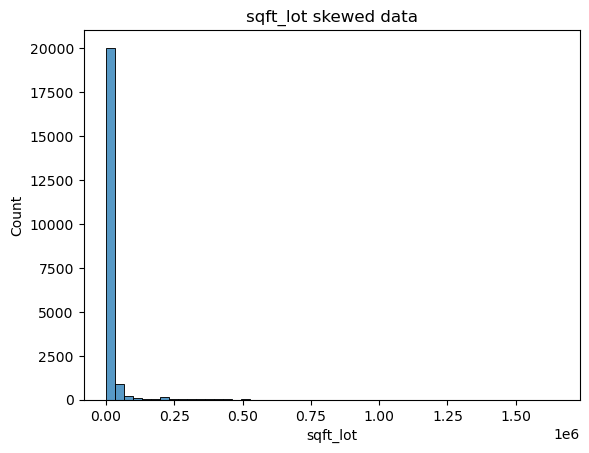

In [66]:
# examine visual example of skew
# other features with significant skew: "sqft_living","sqft_lot", "sqft_lot15", "sqft_basement", "sqft_above", "sqft_living15"
sns.histplot(df_features["sqft_lot"], bins=50)
plt.title("sqft_lot skewed data")
plt.show()

In [67]:
# correct data with significant skew
features_to_log = ["sqft_lot","sqft_lot15", "sqft_living", "sqft_basement", "sqft_above", "sqft_living15"]

# create new columns for the log function output with subscript log_
for col in features_to_log:
    df_features[f"log_{col}"] = np.log1p(df_features[col])

# compare before and after
print(df_features[features_to_log].skew())
print(df_features[[f"log_{col}" for col in features_to_log]].skew())

sqft_lot         13.072604
sqft_lot15        9.524362
sqft_living       1.473215
sqft_basement     1.576890
sqft_above        1.447434
sqft_living15     1.106875
dtype: float64
log_sqft_lot         0.963222
log_sqft_lot15       0.966890
log_sqft_living     -0.026670
log_sqft_basement    0.483369
log_sqft_above       0.260334
log_sqft_living15    0.206445
dtype: float64


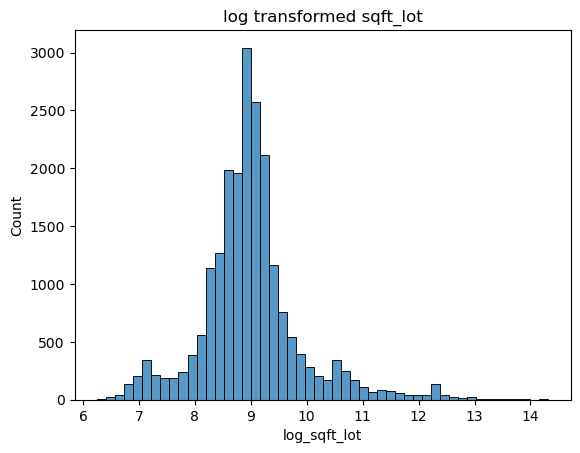

In [68]:
sns.histplot(df_features["log_sqft_lot"], bins=50)
plt.title("log transformed sqft_lot")
plt.show()

In [69]:
print(df_features.columns)

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'log_sqft_lot',
       'log_sqft_lot15', 'log_sqft_living', 'log_sqft_basement',
       'log_sqft_above', 'log_sqft_living15', 'living_to_lot_ratio',
       'price_per_sqft', 'price_sqft_neighbors', 'bath_per_bed',
       'sqft_floors'],
      dtype='object')


### Check Preferred Columns for missing values, dividing by 0, negative values

In [83]:
# "price": any missing values?
df_features["price"].isna().sum()

np.int64(0)

In [84]:
# missing values in bedrooms & bathrooms?
df_features[["bathrooms","bedrooms"]].isna().sum()

bathrooms    0
bedrooms     0
dtype: int64

In [85]:
# check for 0 bedrooms (avoid division by 0 in cases where there are 0 bedrooms)
(df_features["bedrooms"] == 0).sum()

np.int64(0)

In [86]:
# filter out rows with "0" bedrooms
df_features = df_features[df_features["bedrooms"] != 0].copy()

In [87]:
# check for 0 bathrooms since that is odd data (possibly invalid or missing)
df_features[df_features["bathrooms"] == 0]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,log_sqft_lot15,log_sqft_living,log_sqft_basement,log_sqft_above,log_sqft_living15,living_to_lot_ratio,price_per_sqft,price_sqft_neighbors,bath_per_bed,sqft_floors


In [88]:
df_features = df_features[df_features["bathrooms"] > 0].copy() # remove the 3 rows

In [89]:
# check for 0 floors
(df_features["floors"] == 0).sum()

np.int64(0)

In [90]:
# we will divide by sqft_lot
(df_features["log_sqft_lot"] == 0).sum()

np.int64(0)

In [91]:
# we will divide by sqft_living
(df_features["log_sqft_living"] == 0).sum()

np.int64(0)

In [92]:
# negative values?
(df_features["log_sqft_living15"] < 0).sum()

np.int64(0)

In [93]:
# verify new feature columns are present on df_features dataframe
print(df_features.columns)

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'log_sqft_lot',
       'log_sqft_lot15', 'log_sqft_living', 'log_sqft_basement',
       'log_sqft_above', 'log_sqft_living15', 'living_to_lot_ratio',
       'price_per_sqft', 'price_sqft_neighbors', 'bath_per_bed',
       'sqft_floors'],
      dtype='object')


## 2. Feature Engineering

### feature: "living_to_lot_ratio"

In [95]:
print([col for col in df_features.columns if col.startswith("log_")])

['log_sqft_lot', 'log_sqft_lot15', 'log_sqft_living', 'log_sqft_basement', 'log_sqft_above', 'log_sqft_living15']


In [96]:
# engineer feature: living space to lot space ratio
df_features["living_to_lot_ratio"] = df_features["log_sqft_living"]/df_features["log_sqft_lot"]
df_features["living_to_lot_ratio"]

0        0.818803
1        0.883465
2        0.721756
3        0.890086
4        0.825489
           ...   
21608    1.042939
21609    0.893564
21610    0.961149
21611    0.948545
21612    0.992352
Name: living_to_lot_ratio, Length: 21597, dtype: float64

### feature: "price_per_sqft" ⭐

In [98]:
# engineer feature: price per square foot of living space
df_features["price_per_sqft"] = df_features["price"]/df_features["log_sqft_living"]
df_features["price_per_sqft"]

0        31367.873300
1        68517.137028
2        27077.081518
3        79670.661259
4        68667.039556
             ...     
21608    49088.612665
21609    51643.318740
21610    58035.477406
21611    54212.415017
21612    46907.444042
Name: price_per_sqft, Length: 21597, dtype: float64

### feature: "price_sqft_neighbors" ⭐

In [99]:
# price per square foot of 15 closest neighbors' living space
df_features["price_sqft_neighbors"] = df_features["price"]/df_features["log_sqft_living15"]
# df_features["price_sqft_neighbors"]

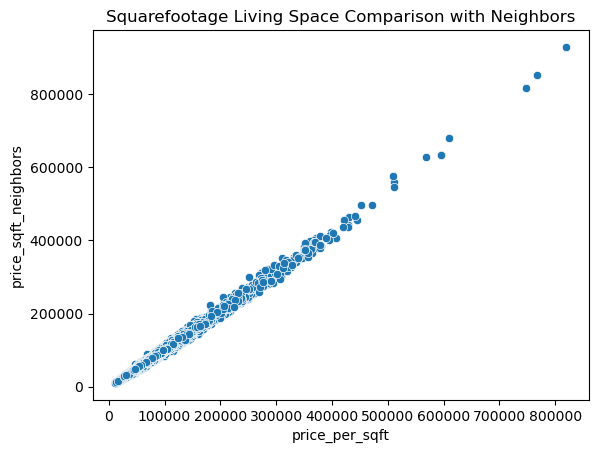

In [101]:
# scatterplot comparing price per square foot of house sold and 15 nearest neighbors
sns.scatterplot(x=df_features["price_per_sqft"], y=df_features["price_sqft_neighbors"])
plt.title("Squarefootage Living Space Comparison with Neighbors")
plt.show()

### feature: "bath_per_bed" 

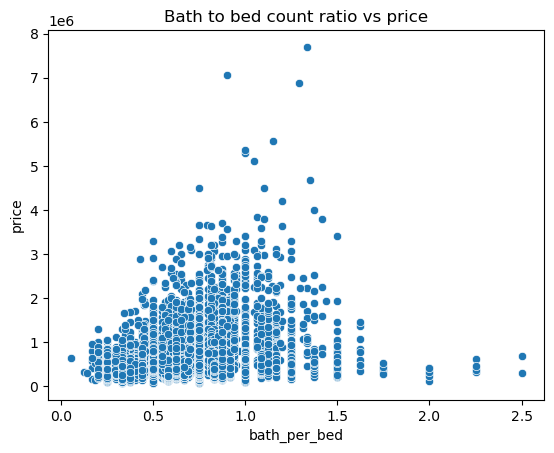

In [102]:
# engineer feature: get ratio to normalize bedroom and bathroom count 
# (property quality and layout balance)
df_features["bath_per_bed"] = df_features["bathrooms"]/df_features["bedrooms"]
# df_features["bath_per_bed"]
sns.scatterplot(x=df_features["bath_per_bed"], y=df_features["price"])
plt.title("Bath to bed count ratio vs price")
plt.show()

In [103]:
# check data values
df_features["bath_per_bed"].isna().sum()

np.int64(0)

### feature: "sqft_floors"

In [104]:
df_features["sqft_floors"] = df_features["log_sqft_living"]/df_features["floors"]
df_features["sqft_floors"]

0        7.074117
1        3.926025
2        6.647688
3        7.581210
4        7.427144
           ...   
21608    2.444559
21609    3.872718
21610    3.464269
21611    3.689192
21612    3.464269
Name: sqft_floors, Length: 21597, dtype: float64

## 3. Model Implementation

In [134]:
print(df_features.columns)

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'log_sqft_lot',
       'log_sqft_lot15', 'log_sqft_living', 'log_sqft_basement',
       'log_sqft_above', 'log_sqft_living15', 'living_to_lot_ratio',
       'price_per_sqft', 'price_sqft_neighbors', 'bath_per_bed',
       'sqft_floors'],
      dtype='object')


In [ ]:
# results for features by r^2 metric:
# X = df_features[["living_to_lot_ratio"]] #0.032
# X = df_features[["price_per_sqft"]] #0.993
# X = df_features[["price_sqft_neighbors"]] #0.995
# X = df_features[["bath_per_bed"]] #0.074
# X = df_features[["sqft_floors"]] #0.031

In [278]:
# Split the data into training and testing sets (80/20)
# X = df_features[["living_to_lot_ratio"]] #0.032
X = df_features[["price_per_sqft"]] #0.993
# X = df_features[["price_sqft_neighbors"]] #0.995
# X = df_features[["bath_per_bed"]] #0.074
# X = df_features[["sqft_floors"]] #0.031

# X = df_features[["log_sqft_living", "price_per_sqft"]] #0.996

y = df_features["price"] #target,
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [279]:
# visually check 80/20 split
print(X_train.shape, X_test.shape)

(17277, 1) (4320, 1)


In [280]:
# visually check 80/20 split
print(y_train.shape, y_test.shape)

(17277,) (4320,)


## 4. Evaluation and Visualization

In [281]:
model = LinearRegression()

In [282]:
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [283]:
# check for feature impact on r2 score
coeff_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)
print(coeff_df)

          Feature  Coefficient
0  price_per_sqft     8.495625


In [284]:
# one-feature-at-a-time regression leaderboard
for col in X_train.columns:
    temp_model = LinearRegression()
    temp_model.fit(X_train[[col]], y_train)
    y_pred = temp_model.predict(X_test[[col]])
    print(f"{col}: R2 = {r2_score(y_test, y_pred):.3f}")

price_per_sqft: R2 = 0.993


In [285]:
y_pred = model.predict(X_test) 

In [286]:
# evaluate: r2 score
r2 = r2_score(y_test, y_pred)
print(f"R^2: {r2:.3f}")

R^2: 0.993


In [287]:
# evaluate: msc score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse:.2f}") # about 29k off from sale prices

RMSE: 29468.09


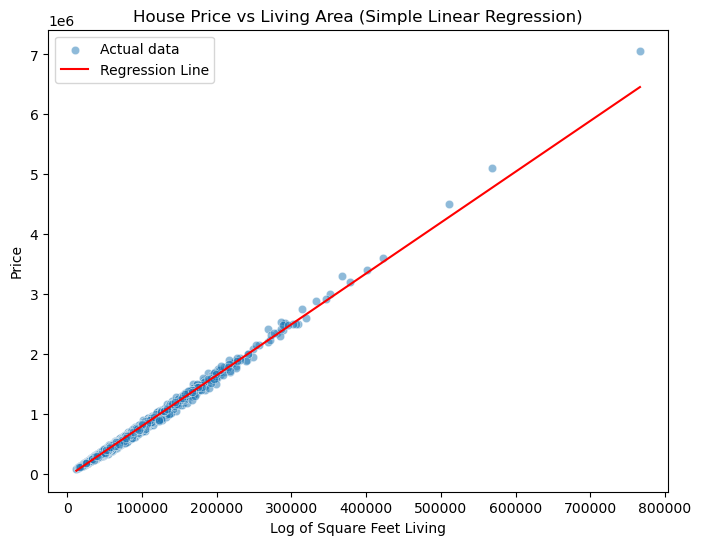

In [291]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_test["price_per_sqft"], y=y_test, alpha=0.5, label="Actual data")
sns.lineplot(x=X_test["price_per_sqft"], y=y_pred, color="red", label="Regression Line")
plt.title("House Price vs Living Area (Simple Linear Regression)")
plt.xlabel("Log of Square Feet Living")
plt.ylabel("Price")
plt.legend()
plt.show()